In [43]:
import numpy as np
import matplotlib.pyplot as plt
import huffman as hf
import pickle
import admm_fq_prires as adfp
import utils

In [2]:
rng = np.random.default_rng()

In [62]:
nr_samples = 100000
mean = 0
var = 0.01
decimals = 10
training_data = rng.normal(mean, np.sqrt(var), (nr_samples,)).round(decimals)
training_data = np.concatenate([training_data, np.zeros((int(nr_samples / 15),))])

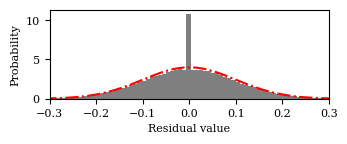

In [77]:
textwidth = 245
linewidth = 1.2
plt.rcParams.update(
    {
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": False,  # don't use inline math for ticks (not on docker image)
        "pgf.rcfonts": False,  # don't setup fonts from rc parameters
        "font.size": 8,
    }
)
fig, ax = plt.subplots(figsize=utils.set_size(textwidth, 1.0, (1, 1), 0.4))
ax.hist(training_data, 100, align="mid", color="k", alpha=0.5, density=True)
x = np.linspace(-0.5, 0.5, 100)
y = 1 / (np.sqrt(2 * np.pi * var)) * np.exp(-1 / 2 * x**2 / var)
ax.plot(x, y, "r-.")
ax.set_xlim(-0.3, 0.3)
# ax.grid()
ax.set_xlabel("Residual value")
ax.set_ylabel("Probability")
plt.tight_layout(pad=0.5)
plt.show()
utils.savefig(fig, "dist-example", "pdf")

In [78]:
data = training_data.tobytes()
encoded, tree = hf.huffman_encode(data)

# Pretty print the Huffman table
print(f"Symbol Code\n------ ----")
for i, (k, v) in enumerate(
    sorted(hf.huffman_table(tree).items(), key=lambda x: len(x[1]))
):
    if i > 10:
        break
    print(f"{k:<6} {v}")
print(".\n.\n.\n")

# Print the bit pattern of the encoded data
# print("".join(hf._bits_from_bytes(encoded)))

# Encode then decode
decoded = hf.huffman_decode(*hf.huffman_encode(data))
numbers_decoded = np.frombuffer(decoded)

# print(numbers - numbers_decoded)
print("Error:", np.linalg.norm(training_data - numbers_decoded))

Symbol Code
------ ----
63     1000
191    1001
0      1010
177    0010110
192    0100110
213    00000000
87     00000001
65     00000010
78     00000011
41     00000100
214    00000101
.
.
.

Error: 0.0


In [38]:
with open("test.p", "wb") as f:
    pickle.dump(tree, f)

In [39]:
with open("test.p", "rb") as f:
    l_tree = pickle.load(f)

encoded, tree = hf.huffman_encode(data)
hf._bits_from_bytes(encoded)
decoded = hf.huffman_decode(encoded, l_tree)
numbers_decoded = np.frombuffer(decoded)

# print(numbers - numbers_decoded)
print("Error:", np.linalg.norm(training_data - numbers_decoded))

Error: 0.0


TEST CODEBOOK SCALING

In [86]:
nr_samples = 100000
mean = 0
var = 1
decimals = 1
training_data = rng.normal(mean, np.sqrt(var), (nr_samples,)).round(decimals)
# training_data = np.concatenate([training_data, np.zeros((int(nr_samples / 15),))])

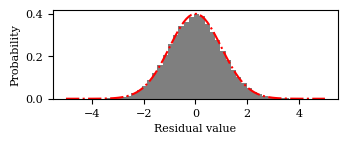

In [95]:
fig, ax = plt.subplots(figsize=utils.set_size(textwidth, 1.0, (1, 1), 0.4))
ax.hist(training_data, 42, align="mid", color="k", alpha=0.5, density=True)
x = np.linspace(-5, 5, 100)
y = 1 / (np.sqrt(2 * np.pi * var)) * np.exp(-1 / 2 * x**2 / var)
ax.plot(x, y, "r-.")
# ax.set_xlim(-0.3, 0.3)
# ax.grid()
ax.set_xlabel("Residual value")
ax.set_ylabel("Probability")
plt.tight_layout(pad=0.5)
plt.show()

In [100]:
data = training_data.tobytes()
encoded, tree = hf.huffman_encode(data)

# Pretty print the Huffman table
print(f"Symbol Code\n------ ----")
for i, (k, v) in enumerate(
    sorted(hf.huffman_table(tree).items(), key=lambda x: len(x[1]))
):
    if i > 10:
        break
    print(f"{np.frombuffer(k.to_bytes()):<6} {v}")
print(".\n.\n.\n")

# Print the bit pattern of the encoded data
# print("".join(hf._bits_from_bytes(encoded)))

# Encode then decode
decoded = hf.huffman_decode(encoded, tree)
numbers_decoded = np.frombuffer(decoded)

# print(numbers - numbers_decoded)
print("Error:", np.linalg.norm(training_data - numbers_decoded))

Symbol Code
------ ----


ValueError: buffer size must be a multiple of element size

In [121]:
import struct

a = np.array([4.0679, 3.5, 1.2])
b = a.tobytes()
print(b)

c = np.frombuffer(b)
print(c)

b'\xf6\x97\xdd\x93\x87E\x10@\x00\x00\x00\x00\x00\x00\x0c@333333\xf3?'


In [ ]:
nr_samples = 100000
mean = 0
var = 4
decimals = 5
training_data = rng.normal(mean, np.sqrt(var), (nr_samples,)).round(decimals)
training_data = np.concatenate([training_data, np.zeros((int(nr_samples / 15),))])

In [ ]:
fig, ax = plt.subplots(figsize=utils.set_size(textwidth, 1.0, (1, 1), 0.4))
ax.hist(training_data, 100, align="mid", color="k", alpha=0.5, density=True)
x = np.linspace(-0.5, 0.5, 100)
y = 1 / (np.sqrt(2 * np.pi * var)) * np.exp(-1 / 2 * x**2 / var)
ax.plot(x, y, "r-.")
ax.set_xlim(-0.3, 0.3)
# ax.grid()
ax.set_xlabel("Residual value")
ax.set_ylabel("Probability")
plt.tight_layout(pad=0.5)
plt.show()